# Implementing Decision Trees

IMPORT THE LIBRARIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATASET, SPLIT INTO TRAIN-TEST SUBSET, FIT ,PREDICT AND EVALUATE.

              precision    recall  f1-score   support

           0       0.43      0.30      0.35        20
           1       0.84      0.90      0.87        79

    accuracy                           0.78        99
   macro avg       0.63      0.60      0.61        99
weighted avg       0.75      0.78      0.76        99



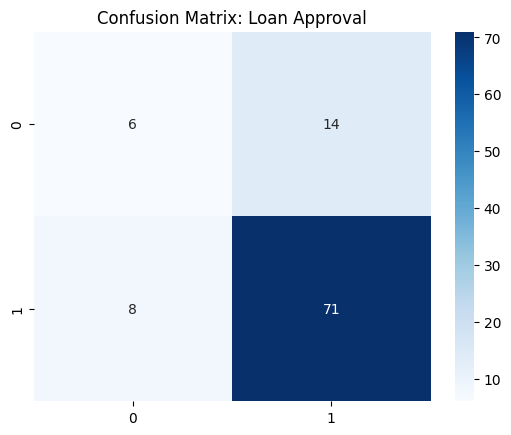

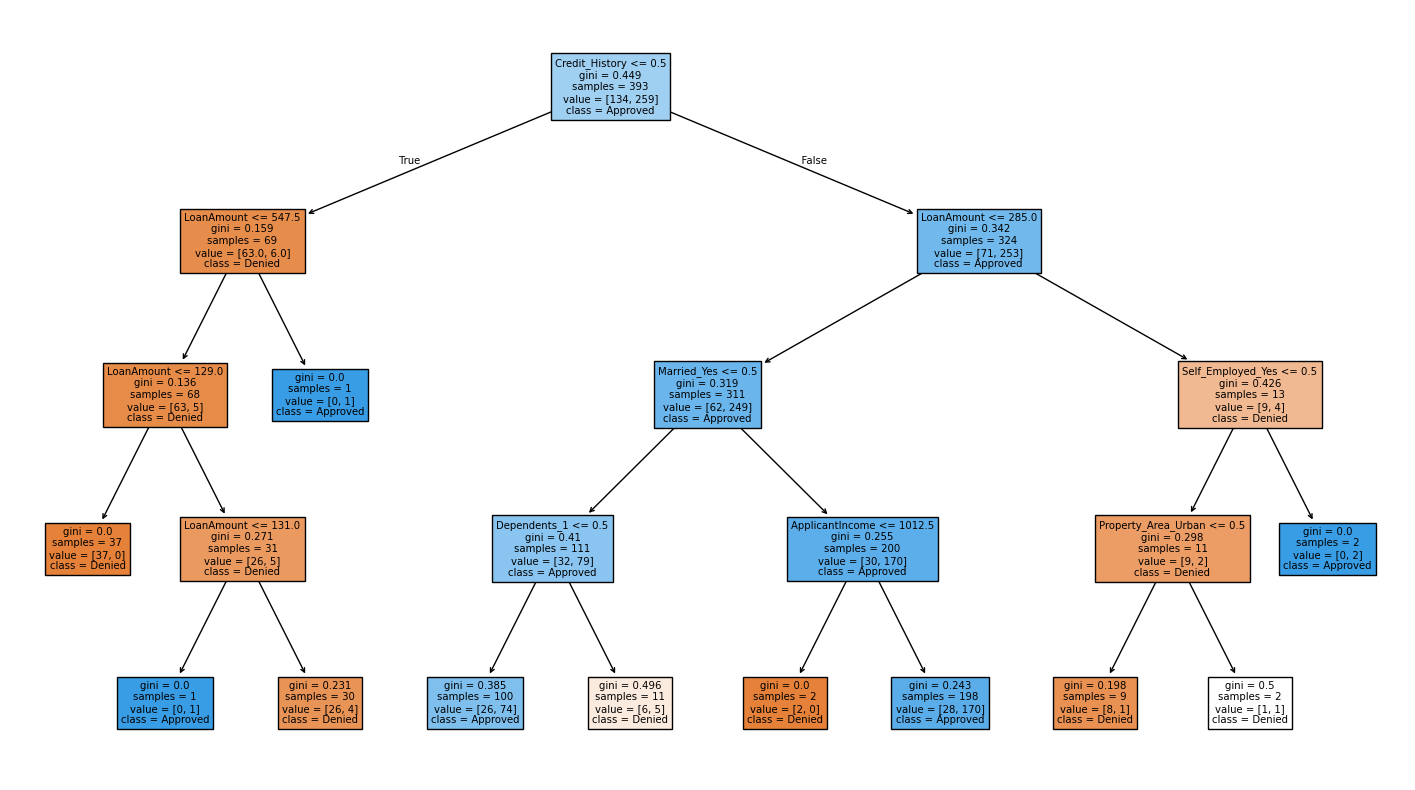

In [ ]:


# Load  dataset
url = "https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv"
df = pd.read_csv(url)

# drop rows with missing values
df = df[['Loan_Status','Gender','Married','Dependents','Education',
         'Self_Employed','ApplicantIncome','CoapplicantIncome',
         'LoanAmount','Credit_History','Property_Area']].dropna()

# Encode categorical variables
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})
df = pd.get_dummies(df, drop_first=True)

# Features & target
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Loan Approval")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(18,10))
plot_tree(model, feature_names=X.columns,
           class_names=['Denied', 'Approved'], filled=True)
plt.show()
